In [7]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
import json
import pprint
import csv
from _io import TextIOWrapper
import requests
from datetime import datetime
import scipy as sp
import pandas as pd
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import statsmodels.api as sm 

In [2]:
DF = pd.read_csv('/Users/Annamira/Documents/GitHub/TRiCAM_BostonAQ/communities_data.csv', header=None)
DF

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
5,6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,...,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14
6,44,7,41500,Lincolntown,1,0.01,0.39,0.00,0.98,0.06,...,0.05,0.08,0.06,?,?,?,?,0.00,?,0.03
7,6,?,?,Selmacity,1,0.01,0.74,0.03,0.46,0.20,...,0.01,0.33,0.00,?,?,?,?,0.00,?,0.55
8,21,?,?,Hendersoncity,1,0.03,0.34,0.20,0.84,0.02,...,0.04,0.17,0.04,?,?,?,?,0.00,?,0.53
9,29,?,?,Claytoncity,1,0.01,0.40,0.06,0.87,0.30,...,0.00,0.47,0.11,?,?,?,?,0.00,?,0.15


In [9]:
#fix question marks

for c in range(0, 128):
    for r in range(0, 1994):
        if DF[c][r] == '?':
            DF.set_value(r, c, 0)

#turns all columns that are numerics encoded as strings into floats
for c in range(4, 127):
    for r in range(0, 1994):
        if type(DF[c][r]) == str:
            DF.set_value(r, c, float(DF[c][r]))

#takes out features columns
x = DF.iloc[:, 4:126]

#takes of what we want to predict
target = DF.iloc[:, 127]


In [10]:
#runs linear regression and returns summary of model

def reg_m(y, x):
    model = sm.OLS(y, x.astype(float)).fit()
    #fits simple ordinary least squares model
    predictions = model.predict(x)
    #makes predictions for y based on x
    return(model.summary())

reg_m(target, x)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    127   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     88.95
Date:                Tue, 27 Jun 2017   Prob (F-statistic):               0.00
Time:                        16:50:34   Log-Likelihood:                 1273.9
No. Observations:                1994   AIC:                            -2304.
Df Residuals:                    1872   BIC:                            -1621.
Df Model:                         122                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
4             -0.0013      0.001     -1.254      0.210        -0.003     0.001
5              0.1734      0.402      0.432      0.666        -0.614     0.961
6             -0.0173      0.087     -0.200      0.842        -0.187     0.153
7              0.2056      0.051      4.053      0.000         0.106     0.305
8             -0.0236      0.058     -0.411      0.681        -0.136     0.089
9              0.0007      0.034      0.022      0.983        -0.065     0.067
10             0.0933      0.054      1.741      0.082        -0.012     0.198
11             0.1785      0.104      1.723      0.085        -0.025     0.382
12            -0.0861      0.150     -0.575      0.566        -0.380     0.208
13            -0.2625      0.160     -1.640      0.101        -0.576     0.051
14             0.1597      0.096      1.659      0.097        -0.029     0.349
15            -0.3147      0.390     -0.807      0.420        -1.080     0.451
16             0.0509      0.016      3.222      0.001         0.020     0.082
17            -0.1431      0.173     -0.825      0.409        -0.483     0.197
18            -0.1212      0.086     -1.414      0.158        -0.289     0.047
19             0.0461      0.020      2.286      0.022         0.007     0.086
20            -0.1419      0.066     -2.149      0.032        -0.271    -0.012
21             0.1356      0.107      1.270      0.204        -0.074     0.345
22             0.0254      0.046      0.554      0.580        -0.065     0.115
23            -0.0751      0.036     -2.066      0.039        -0.146    -0.004
24             0.2560      0.161      1.591      0.112        -0.060     0.572
25             0.1094      0.192      0.569      0.570        -0.268     0.486
26            -0.3420      0.156     -2.191      0.029        -0.648    -0.036
27            -0.0335      0.026     -1.313      0.189        -0.084     0.017
28            -0.0333      0.019     -1.712      0.087        -0.071     0.005
29             0.0230      0.019      1.212      0.225        -0.014     0.060
30             0.0447      0.019      2.387      0.017         0.008     0.081
31             0.0315      0.025      1.265      0.206        -0.017     0.080
32             0.0928      0.160      0.578      0.563        -0.222     0.408
33            -0.1341      0.061     -2.187      0.029        -0.254    -0.014
34            -0.1090      0.068     -1.601      0.110        -0.242     0.025
35             0.0829      0.096      0.862      0.389        -0.106     0.271
36             0.0717      0.078      0.923      0.356        -0.081     0.224
37             0.0253      0.041      0.622      0.534        -0.054     0.105
38             0.2940      0.078      3.771      0.000         0.141     0.447
39            -0.0708      0.032     -2.207      0.027        -0.134    -0.008
40

In [11]:
LinearRegression?

In [5]:
X = DF[5].values
y = DF[127].values

#First break up your data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(X_train.shape, y_train.shape)

(1395,) (1395,)


In [6]:
#Fit a linear regression model on the train data, i.e. find the MLE model

#create an instance of a linear regression object
linear_model = LinearRegression()
#fit the linear regression model to our training data
#you need to worry about the shape of X_train!!!!
linear_model.fit(X_train.reshape((len(X_train), 1)), y_train)

#make predictions using our training data
y_train_predict = linear_model.predict(X_train.reshape((len(X_train), 1)))
#make predictions using our testing data
y_test_predict = linear_model.predict(X_test.reshape((len(X_test), 1)))

#compute error
train_error = np.mean((y_train - y_train_predict)**2)
test_error = np.mean((y_test - y_test_predict)**2)

print('error on training set:', train_error)
print('error on testing set:', test_error)

error on training set: 0.04654785524
error on testing set: 0.0479117534986


In [ ]:


#Try fitting a polynomial regression model. Hint: remember that a polynomial model is secretly a linear model
degree = 2

#create a tool for turning one variable, square footage, into multiple variables, A^2, A^3, etc
poly = PolynomialFeatures(degree)
#add polynomial terms to our training data
X_train_poly = poly.fit_transform(X_train.reshape((len(X_train), 1)))
#add polynomial terms to our testing data
X_test_poly = poly.fit_transform(X_test.reshape((len(X_test), 1)))

print X_train_poly.shape, X_test_poly.shape

#now use X_train_poly, X_test_poly to fit a linear model just like in the above!

<h3> Gaussian version </h3>

Automatically created module for IPython interactive environment


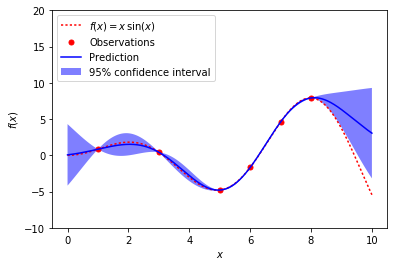

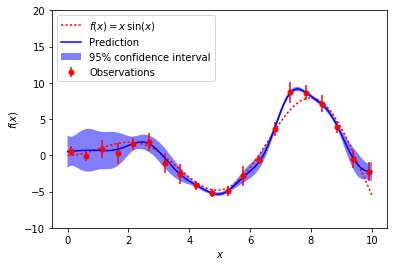

In [12]:
print(__doc__)

# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


def f(x):
    """The function to predict."""
    return x * np.sin(x)

# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 10, 1000)).T

# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

# Instanciate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=(dy / y) ** 2,
                              n_restarts_optimizer=10)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
fig = plt.figure()
plt.plot(x, f(x), 'r:', label=u'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()